In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Midterm - Fall Semester 2016

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use piazza for the duration of the exam, it will be frozen!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every **HOUR** that it is late.  If you feel that there is a special circumstance that warrants consideration tells us **BEFORE** the Tuesday (and more so before the exam starts).

Good luck!

## Question 1

**(a)** (10 points)  Using the second order, centered difference approximation to the first derivative find the $\Delta x$ that gives the smallest absolute error graphically for the function
$$
    f(x) = x \sin(x) + 3 \cos(x) - x
$$  
at $x = 2$.  Repeat this for the first order forward difference.  You do not have to be precise but be within an order of magnitude.

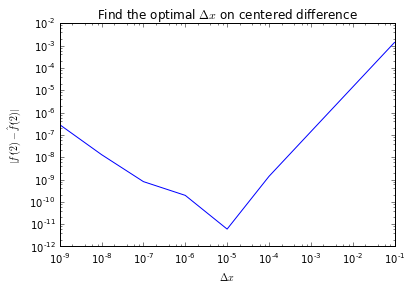

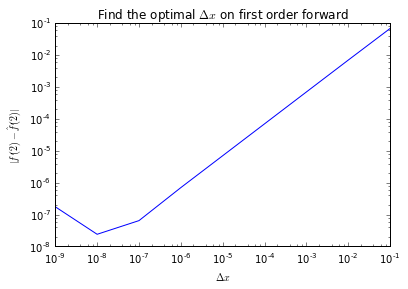

In [2]:
### INSERT CODE HERE
f = lambda x: x*numpy.sin(x) + 3.0 * numpy.cos(x) - x
f_prime = lambda x: numpy.sin(x) + x*numpy.cos(x) + 3.0 * (-numpy.sin(x)) - 1.0

#set delta_x as 0.1, 0.01...
delta_x = []
delta_x_hat = 1.0
for i in xrange(1, 10):
    delta_x_hat *= 0.1
    delta_x.append(delta_x_hat)
    
#calculate the error by using centered difference
f_prime_hat = 0.0
error = 0.0
error_list = []
for n in delta_x:
    f_prime_hat = (f(2.0 + n) - f(2.0 - n)) / (2.0 * n)
    error = numpy.abs(f_prime(2.0) - f_prime_hat)
    error_list.append(error)

#calculate the error by using first order forward difference
f_prime_hat_forward = 0.0
error_forward = 0.0
error_list_forward = []
for n in delta_x:
    f_prime_hat_forward = (f(2.0 + n) - f(2.0)) / n
    error_forward = numpy.abs(f_prime(2.0) -f_prime_hat_forward)
    error_list_forward.append(error_forward)
    
#plot the graph of centered difference
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, error_list)

axes.set_title("Find the optimal $\Delta x$ on centered difference")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(2) - \hat{f}'(2)|$")

#plot the graph of first order forward
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, error_list_forward)

axes.set_title("Find the optimal $\Delta x$ on first order forward")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|f'(2) - \hat{f}'(2)|$")

plt.show()

**(b)** (3 points) Why is there an optimal $\Delta x$?  Why might it be different for each approach?  What method would you choose?

As we can see from the graph in part **(a)**, the optiaml $\Delta x$ for second order centered difference is around $10^{-5}$, while the optimal $\Delta x$ for the first order is around $10^{-8}$.

**1)**
The reason that there is an optimal $\Delta x$:

When $\Delta x$ is $10^{-1}$, $10^{-2}$ (relatively big), the difference is big. This is easy to understand since the points are far from each other, we can't fit the curve very well. However, when $\Delta x$ is $10^{-10}$ (relatively small), the difference is also big. This is because the points are too close, when we calculate $\frac{f(2+\Delta x) - f(2-\Delta x)}{2\Delta x}$ or $\frac{f(2+\Delta x) - f(2)}{\Delta}$, we would lose accuracy both on numerator and denominator due to the $\epsilon_{machine}$, as the result, the error increase (Imagine the extreme situation: when the points are close enough, the result of the numerator might goes to 0 due to the $\epsilon_{machine}$, thus the result of centered difference method goes to 0).

**2)**
Since the centered difference is second order, and the forward difference we use is first order, which means the centered difference will reach our goal faster than the first order forward difference as we can see in the graphs above. After reached our goal, the centered difference will be influence a lot by the $\epsilon_{machine}$ plus the truncation error. Thus, the error goes up also faster than the first order forward difference.

**3)**
I would choose centerd difference because it can reach the minimum error faster, which can help us save time and cost. But I need to be careful when the $\Delta x$ that we choose is too small.

# Question 2

**(a)** (5 points) Analytically compute the interpolating polynomial given by the following data

$\begin{array}{l|l|l|l|l}
x_j  & 0 & 1 & 2 & 3\\
\hline
f_j & 0 & 0 & 6 & 24
\end{array}$

From the given data, by using Monobasis, we have:
$$P(x_0) = P_0 = 0$$
$$P(x_1) = P_0 + P_1 + P_2 + P_3 = 0$$
$$P(x_2) = P_0 + 2P_1 + 4P_2 + 8P_3 = 6$$
$$P(x_3) = P_0 + 3P_1 + 9P_2 + 9P_3 =24$$

Thus, solve above equations, we have:
$$P_0 = 0$$
$$P_1 = -1$$
$$P_2 = 0$$
$$P_3 = 1$$

Therefore, we have the interpolating polynomial is$$P(x) = -x + x^3$$

**(b)** (3 points) Show that the interpolating polynomial you found is indeed an interpolant of the data.

for $x_0 = 0$, we have $$P(x_0) = -x_0 + x_0^3 = -0 + 0^3 = 0$$
for $x_1 = 1$, we have $$P(x_1) = -x_1 + x_1^3 = -1 + 1^3 = 0$$
for $x_2 = 2$, we have $$P(x_2) = -x_2 + x_2^3 = -2 + 2^3 = 6$$
for $x_3 = 3$, we have $$P(x_3) = -x_3 + x_3^3 = -3 + 3^3 = 24$$

Therefore, the interpolating polynomial we found is indeed an interpolant of the data.

**(c)** (2 points) Determine the first and second derivative of $p$ and use the result to describe the shape of the function that data may have come from.  

Since the polynomial we found is $$P_(x) = -x + x^3$$
Thus, the first derivative of p is $$P' = -1 + 2x^2$$
the second derivative of p is $$P'' = 0 + 4x = 4x$$
From the first derivative of p, we know the function will increase in interval $x < -1$, the function will decrease when x in interval $-1 < x < 1$, and it would go up again in interval $1 < x$. 

**(d)** (3 points) Plot the interpolating polynomial with the data points included to verify all that you have found.  Make sure to properly label your plot.  Also mark the maxima and minima you found.

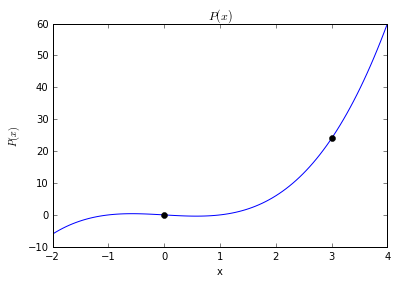

In [78]:
### INSERT CODE HERE
#define our polynomial function
f = lambda x: -x + x**3

#store data set
num_points = 4
data = numpy.empty((num_points, 2))
data[:, 0] = [0, 1, 2, 3]
data[:, 1] = [0, 0 , 6, 24]

#maxima and minima data set
min_max_data = numpy.empty((2, 2))
min_max_data[:, 0] = [0, 3]
min_max_data[:, 1] = [0, 24]
x = numpy.linspace(-2.0, 4.0, 100)

#plot our graph
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), label="$f(x)$")

for point in min_max_data:
    axes.plot(point[0], point[1], 'ko')
axes.set_title("$P(x)$")
axes.set_xlabel("x")
axes.set_ylabel("$P(x)$")
    
plt.show()

## Question 3

Suppose we have a system of non-linear equations we want to solve.  Define
$$
    \vec{x} = [x_0, x_1, \ldots, x_n]
$$ 
and 
$$
    \vec{f}(\vec{x}) = [f_0(\vec{x}), f_1(\vec{x}), \ldots, f_n(\vec{x})] = \vec{0}.
$$ 
We can derive a multi-dimensional version of Newton's method by considering the multi-dimensional Taylor series around the point $\vec{x}$ of each function $f_i$,
$$
    f_i(\vec{x} + \vec{\delta}) = f_i(\vec{x}) + \sum^n_{j = 1} \frac{\partial f_i}{\partial x_j} \delta_j + \mathcal{O}(\Delta x^2).
$$
where
$$
    \vec{\delta} = [\delta_0, \delta_1, \ldots, \delta_n]
$$
and
$$
    \Delta x = \max_{i=0, n} \delta_i.
$$

As we did before for Newton's method we drop the higher order terms and set $\vec{f}(\vec{x} + \vec{\delta}) = 0$ we can rewrite the above equation as
$$
    \mathbf{J}(\vec{x}) \vec{\delta} = -\vec{f}(\vec{x})
$$
where $\mathbf{J}$ is the Jacobian matrix defined by
$$
    J_{ij} = \frac{\partial f_i}{\partial x_j}.
$$
This is now a linear system that needs to be solved for the vector $\vec{\delta}$ which can then be used in the update formula
$$
    \vec{x}_{i+1} = \vec{x}_i + \vec{\delta}.
$$

For the rest of the question please consider the system (note that $\log$ is the natural log)
$$\begin{aligned}
    \sin x + y^2 + \log z - 7 = 0& \\
    3 x + 2^y - z^3 + 1 = 0& \\
    x + y + z - 5.0= 0&
\end{aligned}$$

**(a)** (3 points) Analytically find the Jacobian of the system of equations.

from the equations above, we have:

$$f_1(x, y, z) = sin(x) + y^2 + log z - 7$$
$$f_2(x, y, z) = 3x + 2^y - z^3 + 1$$
$$f_3(x, y, z) = x + y + z - 5.0$$

Thus, we Jacobian matrix:

$$J_{f(x,y,z)} = \begin{bmatrix} 
    cos(x)   & 2y         & \frac{1}{z} \\
    3        & ln(2)2^y   & -3z^2       \\
    1        & 1          & 1           \\
\end{bmatrix}
$$


**(b)** (3 points) Write a function that computes the Jacobian matrix given a vector $\vec{x} = [x, y ,z]$.

In [4]:
def jacobian(x):
    ### INSERT CODE HERE
    #comput x
    Jacobian_array = numpy.array([[numpy.cos(x[0]), 2.0*x[1], 1.0/x[2]],
                                  [3.0*x[0], numpy.log(2)*2.0**x[1], -3.0*x[2]**2],
                                  [1.0, 1.0, 1.0]])
    return Jacobian_array

In [5]:
x = (1.0, 1.0, 1.0)
answer = jacobian(x)
true = numpy.array([[ 0.5403023058681398, 2.0, 1.0],
                    [ 3.0, 1.3862943611198906, -3.0],
                    [1.0, 1.0, 1.0]])
numpy.testing.assert_allclose(jacobian((1.0, 1.0, 1.0)), true)
print "Success!"

Success!


**(c)** (10 points) Using the function from (b) write a new function that finds the root given an initial guess $\vec{x}_0$ using Newton's method for the system.  Use the `numpy.linalg.solve` command to solve the linear system at each step.  As a stopping criteria check that the distance of $\vec{f}(\vec{x})$ from $\vec{0}$ is below the given tolerance.

In [6]:
def newton(x, tolerance=1e-10):
    ### INSERT CODE HERE
    x = [1.0, 1.0, 1.0]
    for i in xrange(1, 100):
        f1 = numpy.sin(x[0]) + x[1]**2 + numpy.log(x[2]) - 7.0
        f2 = 3.0 * x[0] + 2**x[1] - x[2]**3 + 1.0
        f3 = x[0] + x[1] + x[2] - 5.0
        F = numpy.array([[f1],[f2],[f3]])
  
        Jacobian_array = jacobian(x)
        Identity_array = numpy.identity(3)
        Inverse_Jacobian = numpy.linalg.solve(Jacobian_array, Identity_array)
        Delta = numpy.dot(Inverse_Jacobian, F)
        Transpose_Delta = Delta.transpose()
        Transpose_final = Transpose_Delta[0]
    
        x[0] = x[0] - Transpose_final[0] 
        x[1] = x[1] - Transpose_final[1] 
        x[2] = x[2] - Transpose_final[2] 
    
    return x


In [7]:
numpy.testing.assert_allclose(newton(x), numpy.array([ 0.5990537566405669, 2.3959314023778169, 2.005014840981616 ]))
print "Success!"

Success!


## Question 4

Consider the Lennard-Jones potential between two molecules
$$
    V(r) = 4 \epsilon \left [ \left(\frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right ]
$$
where $\epsilon$ and $\sigma$ are constants, and $r$ is the distance between the molecules.

**(a)** (10 points) Analytically find the minimum $\sigma / r$ that minimizes the potential.  Plot the potential and the minimum you found as a check.

To find the minimum $\sigma/r$ that minimized the potential. We wanna find at which point, the derivative is 0. 

Thus, we took derivative of $V(r)$: $$V(r)'= 4\epsilon [-12(\frac{\sigma^{12}}{r^{13}}) - (-6(\frac{\sigma^6}{r^7}))]$$

Simiplify it to: $$V(r)' = \frac{24\epsilon}{r}(\frac{\sigma}{r})^6[1 - 2(\frac{\sigma}{r})^6]$$

We know $r \neq 0$, $\sigma \neq 0$, thus, the only thing that it can be zero is $$1 - 2(\frac{\sigma}{r})^6 = 0$$

Solve this equation, we'll get $$r = \pm 2^{\frac{1}{6}}\sigma$$

Since $r$ is the distance between the molecules and $\sigma$ won't be negative based on the physics meaning.

Therefore, we drop the negative value, and find the minimum $\frac{\sigma}{r}$ is $\frac{1}{\sqrt[6]{r}} \approx 0.89$


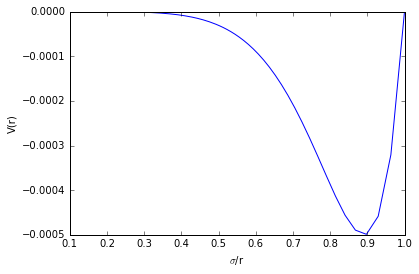

In [79]:
epsilon = 5e-4
sigma = 3e-1
f = lambda r: 4.0 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

#data set
N = 150
r = numpy.linspace(0.3, 2.0, N)

#plot our graph
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
V_r = f(r)
axes.plot(sigma/r, V_r)
axes.set_xlabel("$\sigma$/r")
axes.set_ylabel("V(r)")

fig.show()

**(b)** (10 points) Using Golden section search compute the minimum of the potential numerically down to a bracket size of $10^{-6}$.  Plot the convergence to the true solution you found (the location) above at each step of the algorithm.  Also plot the potential and the minimum you found.  You can choose any value of $\epsilon$ you want.

Success!
  min sigma/r = 0.890898956503
  V(r) = -0.000499999999999
  number of steps = 27


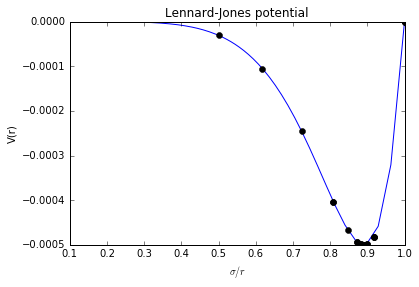

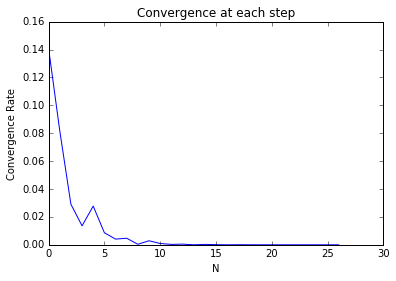

In [82]:
### INSERT CODE HERE
#data set
epsilon = 5e-4
sigma = 3e-1
f = lambda r: 4.0 * epsilon * ((sigma/r)**12 - (sigma/r)**6)

N = 150
r = numpy.linspace(0.3, 2.0, N)
phi = (numpy.sqrt(5.0) - 1.0) / 2.0

TOLERANCE = 1e-6
MAX_STEPS = 100

#prepare for Golden section search
a = sigma/0.5
b = sigma
c = b - phi * (b - a)
d = a + phi * (b - a)

#plotting graph respect to potential and minimum
fig = plt.figure()
V_r = f(r)
axes = fig.add_subplot(1, 1, 1)
axes.plot(sigma/r, V_r)
axes.set_xlabel("$\sigma/r$")
axes.set_ylabel("V(r)")
axes.set_title("Lennard-Jones potential")

success = False
real_location = 0.890898956503
convergence_point_at_each_step = 0.0
convergence_list = []

#Implementing Golden section search
for n in xrange(1, MAX_STEPS + 1):
    axes.plot(sigma/a, f(a),'ko')
    axes.plot(sigma/b, f(b),'ko')
    fc = f(c)
    fd = f(d)
    
    #collecting middle point of every step for plotting the convergence rate
    convergence_point_at_each_step = numpy.abs((((sigma/b) + (sigma/a)) / 2.0) - real_location )
    convergence_list.append(convergence_point_at_each_step)
    
    if fc < fd:
        b = d
        d = c
        c = b - phi * (b - a)    
    else:
        a = c
        c = d
        d = a + phi * (b - a)
        
    if numpy.abs(b - a) < TOLERANCE:
        success = True
        break
        
if success:
    print "Success!"
    print "  min sigma/r = %s" % str(((sigma/b) + (sigma/a)) / 2.0)
    print "  V(r) = %s" % f((b + a) / 2.0)
    print "  number of steps = %s" % n
else:
    print "Reached maximum number of steps!"

#plotting the graph for convergence rate
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(convergence_list)
axes.set_xlabel("N")
axes.set_ylabel("Convergence Rate")
axes.set_title("Convergence at each step")

plt.show()

## Question 5

The equation for an ellipse is $x^2/a^2 + y^2/b^2=1$.  The general equation for arc-length and therfore the circumference of an ellipse can be computed using
$$
    S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx.
$$

**(a)** (3 points) We can approximate the circumference by following a paper by Srinivasa Ramanujan in 1914 [1] where
$$
    S \approx \pi (a + b) \left ( 1 + \frac{3 h}{10 + \sqrt{4 - 3 h}} \right )
$$

which is $h^5$ order accurate where 
$$
    h = \frac{(a-b)^2}{(a + b)^2}.
$$
Implement a function that computes the approximation using Ramanujan's result.

1. Ramanujan, Srinivasa, (1914). "Modular Equations and Approximations to $\pi$". 
   Quart. J. Pure App. Math. 45: 350-372.

In [10]:
def S_ramanujan(a, b):
    ### INSERT CODE HERE
    h = 0.0
    h = (a - b)**2 / (a + b)**2
    S = 0.0
    S = numpy.pi * (a + b) * (1.0 + (3.0 * h / (10.0 + numpy.sqrt(4.0 - 3.0 * h))))
    
    return S

In [11]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ramanujan(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Computed = 11.6120262043
True = 11.612026259
Error = 5.46598464268e-08
Success!


**(b)** (10 points) Another way to compute the circumference is to use a series due to Ivory and Bessel (you can find the original papers online which may be worth a look).  One way to write this series is

$$S = \pi (a + b) \sum^{\infty}_{n=0} \left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)^2 h^n ~~~~~ \text{with} ~~~~~~ h = \frac{(a - b)^2}{(a+b)^2}$$

where $\left(\begin{aligned} 0.5 \\ n~~ \end{aligned} \right)$ is the binomial coefficient which can be computed via a `scipy` function.  Write a function to compute this series to a point where the difference between the partial sums is less than $\epsilon_{\text{machine}}$.

In [12]:
def S_ivory(a, b):
    ### INSERT CODE HERE
    h = 0.0
    h = (a - b)**2 / (a + b)**2
    N = 100
    S = 0.0
    Sum = 0.0
    for n in xrange(N):
        Sum += scipy.special.binom(0.5, n)**2 * h**n
    S = numpy.pi * (a + b) * Sum
    return S

In [13]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
computed = S_ivory(x[1], x[0])
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true)
print "Success!"

Computed = 11.0844271229
True = 11.0844271229
Error = 1.7763568394e-15
Success!


**(c)** (5 points) Derive an expression for the integrand using implicit differentiation.

Because $x^2/a^2 + y^2/b^2=1$ and
$$
    S = 2 \int^a_{-a} \sqrt{1 + (\text{d}y/\text{d}x)^2} dx.
$$

We can use 2nd order centered difference to represent $\text{d}y/\text{d}x$:

$$y = \frac{b\sqrt(a^2 - x^2)}{a}$$

$$y' = \frac{b\sqrt{a^2 - x_{n+1}} - \sqrt{a^2 - x_{n-1}}}{2\Delta x a}$$

Then, we rewrite the S equation:

$$
    S = 2 \int^a_{-a} \sqrt{1 + y'^2} dx.
$$

let $g(x) = \sqrt{1 + y'^2}$

by using Trapezoidal Rule, we have:

$$Q(g) = \frac{\Delta x}{2} (g(x_0) + g(x_N) ) + \sum^{N-1}_{j=1} \Delta x g(x_j)$$

$$S \approx Q(g)$$

**(d)** (10 points) Write a function that computes the integral to a given tolerance.  Note that this may converge very slowly so use a high enough order quadrature rule so that the computation takes less than a minute to do (this will result in an error otherwise).  Suggested largest $N$ is $1000$.  If the integration does not succeed raise a `ValueError`.  Use the `S_exact` function used in the tests above to evaluate the tolerance.

In [83]:
def S_direct(a, b, tolerance):
    ### INSERT CODE HERE
    f = lambda x: numpy.sqrt(a**2 - x**2) * b / a
    num_partitions = 10**4
    x_hat = numpy.linspace(-a, a, num_partitions + 1)
    delta_x = x_hat[1] - x_hat[0]
    
    #the middle y's
    f_prime_hat = numpy.empty(x_hat.shape)
    f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x)
    
    #on the left point and right point using 1st order
    f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     
    f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x
    
    #g is the result of function sqrt(1 + y')
    g = 0.0
    g_list = []
    
    for i in f_prime_hat:
        g = numpy.sqrt(1.0 + i**2)
        g_list.append(g)
    S = 0.0
    sum_1 = 0.0
    sum_2 = (g_list[0] + g_list[-1]) * delta_x / 2.0
    for i in xrange(1, num_partitions):
        sum_1 += delta_x*g_list[i]
    S = 2.0 * (sum_2 + sum_1) 
        
    return S

In [84]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-1
computed = S_direct(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Computed = 11.2648868512
True = 11.2648988151
Error = 1.1963901505e-05
Success!


**(e)** (10 points) Note that we have been using a special function from SciPy called `ellipe`.  This function computes the elliptic integral of the second kind
$$
    E(e) = \int^{\pi/2}_0 \sqrt{1 - e^2 \sin^2 \theta} d\theta
$$
which is the arc-length over one quadrant of the ellipse.  The value $e$ is the eccentricity defined as
$$
    e = \sqrt{1 - b^2 / a^2}
$$
where here we need to define $a$ as the major-axis and $b$ the minor-axis of the ellipse (this definition is slightly different than the one in SciPy which we have been accommodating).  Elliptic integrals are a broad class of special functions that all arose from attempts at computing things related to ellipses.

Again write a function that computes the circumference of an ellipse to a provided tolerance but using this formulation of the problem.  If the integration does not succeed raise a `ValueError`.  Remember that computing the function above only gives you one quarter of the circumference and to find the total circumference you want to use
$$
    S = 4 a E(e).
$$

In [86]:
def S_elliptic_integral(a, b, tolerance):
    ### INSERT CODE HERE
    S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
    true = S_exact(x[1], x[0])
    S = 0.0
    error = 1.0
    e = numpy.sqrt(1.0 - b**2/a**2)
    f = lambda x: numpy.sqrt(1.0 - e**2 * numpy.sin(x)**2)
    
    #using Gauss-4 point
    num_partitions = 1000
    x_hat = numpy.linspace(0.0, numpy.pi/2.0, num_partitions)
    delta_x = x_hat[1] - x_hat[0]
    for j in xrange(num_partitions):
        if error < tolerance:
            break
        else:
            xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
            xi = [-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
                   numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
                  -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
                   numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]
            w = [(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
                 (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]
            Qf = 0.0
            for i in xrange(0, num_partitions - 1):
                for k in xrange(len(xi)):
                    Qf += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
            Qf *= delta_x / 2.0
            S = 4.0 * a * Qf
            error = numpy.abs(true - S)
    return S

In [87]:
x = numpy.random.random((2)) * 2.0 + 1.0
x.sort()
import scipy.special
S_exact = lambda a, b: 4.0 * a * scipy.special.ellipe(1.0 - b**2 / a**2)
tolerance = 1e-10
computed = S_elliptic_integral(x[1], x[0], tolerance)
true = S_exact(x[1], x[0])
print "Computed = %s" % computed
print "True = %s" % true
print "Error = %s" % (numpy.abs(computed - true))
numpy.testing.assert_allclose(computed, true, atol=tolerance)
print "Success!"

Computed = 15.9465055455
True = 15.9465055455
Error = 8.881784197e-15
Success!
